# Importing Necessary Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

C:\Users\manik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'C:\Users\manik\OneDrive\datasets\NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Sorting

In [5]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
data=df.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualization

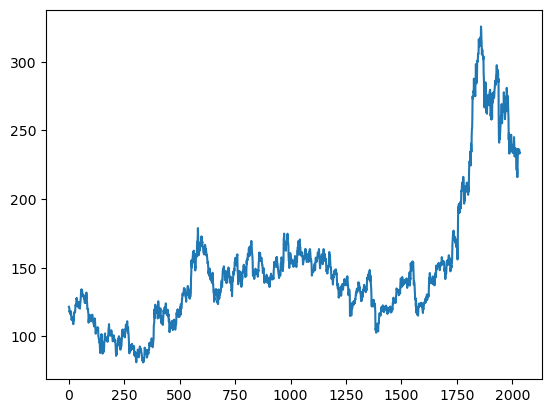

In [9]:
plt.plot(data['Close'])

In [10]:
dff=data['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Min Max Scaler

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Spliting the Dataset

In [12]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

# Convert an array of values into a dataset matrix

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Spliting Data into Train and Test

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the LSTM Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_split=0.1,epochs=25,batch_size=64,verbose=1)

Epoch 1/25
19/19 [==============================] - 5s 290ms/step - loss: 6.6455e-04 - val_loss: 8.7240e-04
Epoch 2/25
19/19 [==============================] - 6s 296ms/step - loss: 6.7566e-04 - val_loss: 8.5443e-04
Epoch 3/25
19/19 [==============================] - 5s 269ms/step - loss: 6.3771e-04 - val_loss: 7.2637e-04
Epoch 4/25
19/19 [==============================] - 6s 330ms/step - loss: 6.0305e-04 - val_loss: 7.1005e-04
Epoch 5/25
19/19 [==============================] - 5s 276ms/step - loss: 5.9829e-04 - val_loss: 7.1547e-04
Epoch 6/25
19/19 [==============================] - 5s 280ms/step - loss: 5.7626e-04 - val_loss: 7.4718e-04
Epoch 7/25
19/19 [==============================] - 6s 292ms/step - loss: 5.6151e-04 - val_loss: 7.2626e-04
Epoch 8/25
19/19 [==============================] - 6s 307ms/step - loss: 5.4114e-04 - val_loss: 5.9759e-04
Epoch 9/25
19/19 [==============================] - 6s 304ms/step - loss: 5.3242e-04 - val_loss: 5.5679e-04
Epoch 10/25
19/19 [=========

# Prediction and Checking Performance

In [22]:
test_predict=model.predict(X_test)

16/16 [==============================] - 3s 42ms/step


In [23]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[139.70021 ],
       [140.0531  ],
       [140.06454 ],
       [139.29807 ],
       [138.23557 ],
       [137.15916 ],
       [136.57526 ],
       [136.51384 ],
       [136.62527 ],
       [136.76953 ],
       [136.97609 ],
       [137.5796  ],
       [138.27492 ],
       [139.30304 ],
       [140.72362 ],
       [141.19763 ],
       [140.95038 ],
       [140.57442 ],
       [140.23077 ],
       [141.24316 ],
       [143.0863  ],
       [145.20084 ],
       [147.14197 ],
       [148.17253 ],
       [148.90028 ],
       [149.10785 ],
       [149.08682 ],
       [149.28413 ],
       [149.42943 ],
       [149.48149 ],
       [149.63347 ],
       [149.3943  ],
       [148.29288 ],
       [145.79337 ],
       [142.87514 ],
       [140.21924 ],
       [138.15866 ],
       [136.44519 ],
       [134.7593  ],
       [132.7787  ],
       [130.90756 ],
       [129.36845 ],
       [127.74576 ],
       [126.50446 ],
       [125.11565 ],
       [123.51311 ],
       [122.30127 ],
       [121.3

# Calculating performance

In [25]:
import math
from sklearn.metrics import mean_squared_error

In [26]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.07790126850925279